In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
# read df
df = pd.read_csv("visit_data.csv")
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [39]:
# check for duplicate rows in overall df
duplicate = df[df.duplicated(keep = 'last')]
print('There are',len(duplicate),'duplicated rows in this df')

There are 0 duplicated rows in this df


In [40]:
# check for duplicates by columns
email_dup = df[df.duplicated('email')] 
ip_dup = df[df.duplicated('ip_address')] 
last_dup = df[df.duplicated('last_name')] 

In [41]:
# print duplicate results
print('there are',len(email_dup), 'duplicated email addresses.')
print('there are',len(ip_dup), 'duplicated IP addresses.')
print('there are',len(last_dup), 'duplicated last names.')

there are 0 duplicated email addresses.
there are 0 duplicated IP addresses.
there are 299 duplicated last names.


In [42]:
# check last name duplicates
last_dup.head()

,id,first_name,last_name,email,gender,ip_address,visit
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
7,8,NaN,NaN,mdewilde7@creativecommons.org,Female,229.215.244.227,537.0
11,12,NaN,NaN,jmccotterb@ning.com,NaN,180.112.224.129,127.0
13,14,NaN,NaN,gkippied@infoseek.co.jp,NaN,248.75.123.182,1867.0
15,16,NaN,NaN,wclowleyf@usda.gov,Male,45.37.121.91,1331.0


In [43]:
# check for NaN values in essential columns
nan_email =  df.email.isnull().values.any()
nan_ip = df.ip_address.isnull().values.any()
nan_visit = df.visit.isnull().values.any()

In [44]:
# display results
print('Are there NaN email values?',nan_email)
print('Are there NaN IP address values?',nan_ip)
print('Are there NaN visit values?',nan_visit)

Are there NaN email values? False
Are there NaN IP address values? False
Are there NaN visit values? True


In [45]:
# remove rows with NaN values in visit column
df1 = df.dropna(subset=['visit'])

In [46]:
# check to make sure they are removed
nan_visit = df1.visit.isnull().values.any()
nan_visit

False

In [68]:
# show difference
print('The full df has', len(df), 'rows, but after removing NaN values from the visit column we have',
     len(df1), 'rows.\n\n This is a difference of', len(df)-len(df1), 'rows.')

The full df has 1000 rows, but after removing NaN values from the visit column we have 923 rows.

 This is a difference of 77 rows.


{'whiskers': [<matplotlib.lines.Line2D at 0x1213a92e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1213a99a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12139bf40>],
 'medians': [<matplotlib.lines.Line2D at 0x1213b40a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1213b43a0>],
 'means': []}

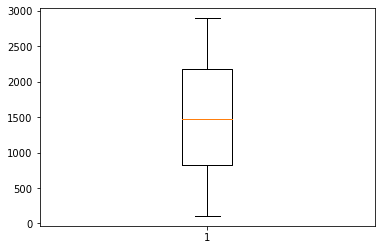

In [69]:
# show spread of visit 
plt.boxplot(df1.visit)

In [72]:
# choose parameters to define outliers and create new df without them
df2 = df1[(df1['visit'] <= 2900) & (df1['visit'] >= 100)]

In [73]:
print('After removing outliers from the visit column we have',len(df2), 'rows.')

After removing outliers from the visit column we have 923 rows.
